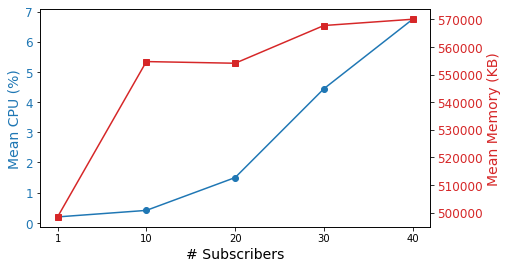

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-pubsub-multi.csv')

# Define the custom label order
custom_label_order = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
#labels = grouped_data['label'].values
labels = ['1','10','20','30','40']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red', fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title

plt.xticks(fontsize=12)

plt.savefig('figs/cpu_mem_multi_sub_cpp.pdf')

# Show the plot
plt.show()

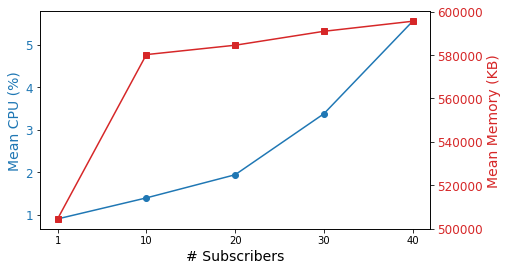

In [74]:
# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-pubsub-multi.csv')

# Define the custom label order
custom_label_order = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data = data.groupby('label').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
#labels = grouped_data['label'].values
labels = ['1','10','20','30','40']
mean_cpu = grouped_data['cpu'].values
mean_mem = grouped_data['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue',fontsize=14)
ax1.plot(labels, mean_cpu, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:red',fontsize=14)
ax2.plot(labels, mean_mem, color='tab:red', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=12)

# Set labels and title
plt.xticks(fontsize=14)

plt.savefig('figs/cpu_mem_multi_sub_py.pdf')

# Show the plot
plt.show()

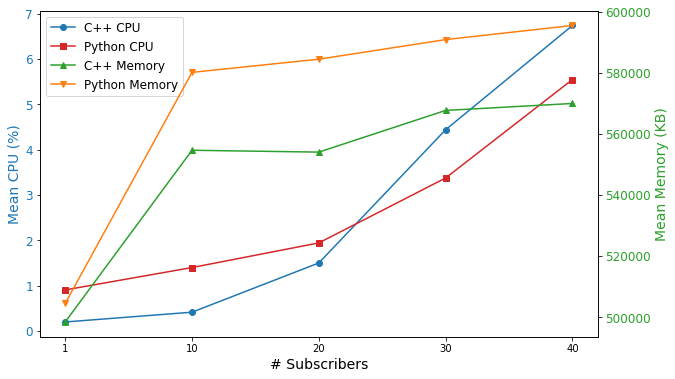

In [129]:
# Read the CSV file into a DataFrame
data = pd.read_csv('../resource-pubsub-multi.csv')

# Define the custom label order
custom_label_order_cpp = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
custom_label_order_py = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']

# Convert the 'label' column to a categorical data type with the custom order
data['label_cpp'] = pd.Categorical(data['label'], categories=custom_label_order_cpp, ordered=True)
data['label_py'] = pd.Categorical(data['label'], categories=custom_label_order_py, ordered=True)

# Group the data by 'label' and calculate mean CPU and mem
grouped_data_cpp = data.groupby('label_cpp').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()
grouped_data_py = data.groupby('label_py').agg({'cpu': 'mean', 'mem': 'mean'}).reset_index()

# Get the labels in the specified order
labels = ['1', '10', '20', '30', '40']
mean_cpu_cpp = grouped_data_cpp['cpu'].values
mean_mem_cpp = grouped_data_cpp['mem'].values
mean_cpu_py = grouped_data_py['cpu'].values
mean_mem_py = grouped_data_py['mem'].values

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('# Subscribers', fontsize=14)

# Create the first y-axis (CPU)
ax1.set_ylabel('Mean CPU (%)', color='tab:blue', fontsize=14)
ax1.plot(labels, mean_cpu_cpp, color='tab:blue', marker='o', label='C++ CPU')
ax1.plot(labels, mean_cpu_py, color='tab:red', marker='s', label='Python CPU')
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)

# Create the second y-axis (mem)
ax2 = ax1.twinx()
ax2.set_ylabel('Mean Memory (KB)', color='tab:green', fontsize=14)
ax2.plot(labels, mean_mem_cpp, color='tab:green', marker='^', label='C++ Memory')
ax2.plot(labels, mean_mem_py, color='tab:orange', marker='v', label='Python Memory')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)

# Set labels and title
plt.xticks(fontsize=12)

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# Save the plot as a PDF file
plt.savefig('figs/pubsub_cpu_mem_comparison.pdf')

# Show the plot
plt.show()

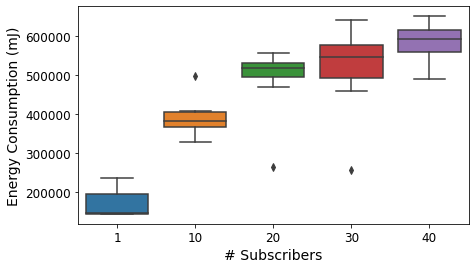

In [119]:
## CPU Cpp Boxplot (CPP)

data = pd.read_csv('../result-pubsub-multi_sub.csv')

custom_label_order = ['pub_cpp_1', 'pub_cpp_10', 'pub_cpp_20', 'pub_cpp_30', 'pub_cpp_40']
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

data['cpu_dram'] = data['pkg'] + data['dram']
data['cpu_dram_mj'] = data['cpu_dram'] / 1000

# Create a boxplot for each label
plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='cpu_dram_mj', data=data)
#sns.swarmplot(x='label', y='pkg', data=data, color='black', size=4)  # Add individual data points
# Calculate and plot the means as lines
means = data.groupby('label')['cpu_dram_mj'].mean().reset_index()
#for i, mean_row in means.iterrows():
#    plt.axhline(y=mean_row['pkg'], color='r', linestyle='--', label=f'Mean ({mean_row["label"]})')

new_labels = ['1','10','20','30','40']

#labels = ['1','10','20','30','40']
# Customize the plot
plt.ylabel('Energy Consumption (mJ)', fontsize=14)
#plt.legend()
#plt.xticks(custom_label_order,new_labels,fontsize=12)
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)
plt.xlabel('# Subscribers', fontsize=14)

ax = plt.gca()  # Get the current axis
ax.set_xticklabels(new_labels, fontsize=12)

plt.savefig('figs/energy_consumption_multi_sub_cpp.pdf')

# Show the plot
plt.show()

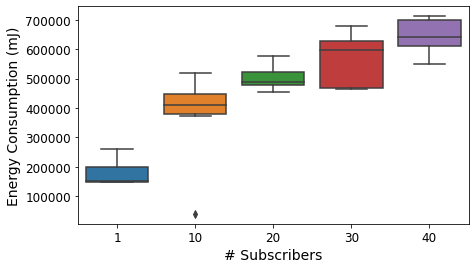

In [120]:
## CPU Cpp Boxplot (Python)

data = pd.read_csv('../result-pubsub-multi_sub.csv')

custom_label_order = ['pub_py_1', 'pub_py_10', 'pub_py_20', 'pub_py_30', 'pub_py_40']
data['label'] = pd.Categorical(data['label'], categories=custom_label_order, ordered=True)

data['cpu_dram'] = data['pkg'] + data['dram']
data['cpu_dram_mj'] = data['cpu_dram'] / 1000

# Create a boxplot for each label
plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='cpu_dram_mj', data=data)
#sns.swarmplot(x='label', y='pkg', data=data, color='black', size=4)  # Add individual data points

# Calculate and plot the means as lines
means = data.groupby('label')['cpu_dram_mj'].mean().reset_index()
#for i, mean_row in means.iterrows():
#    plt.axhline(y=mean_row['pkg'], color='r', linestyle='--', label=f'Mean ({mean_row["label"]})')

# Customize the plot
plt.ylabel('Energy Consumption (mJ)', fontsize=14)
#plt.legend()

new_labels = ['1','10','20','30','40']
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)
plt.xlabel('# Subscribers', fontsize=14)

ax = plt.gca()  # Get the current axis
ax.set_xticklabels(new_labels, fontsize=12)


plt.savefig('figs/energy_consumption_multi_sub_py.pdf')

# Show the plot
plt.show()